# Exploring the demonstration models

This notebook shows several standard ways to interact with the demonstrations stored into the exp/run directories. 

In [15]:
import sys
sys.path.append("..")
from exp_run_config import Config
Config.PROJECTNAME = "BerryPicker"

import matplotlib.pyplot as plt
import random
from demonstration import Demonstration, list_demos, select_demo

In [16]:
experiment = "demonstration"
run = "freeform"

exp = Config().get_experiment(experiment, run)

***ExpRun**: Experiment default config C:\Users\lboloni\Documents\Code\_Checkouts\BerryPicker\src\experiment_configs\demonstration\_demonstration.yaml was empty, ok.
***ExpRun**: No system dependent experiment file
	 G:\My Drive\LotziStudy\Code\PackageTracking\BerryPicker\settings\experiment-config\LotziYoga\demonstration\freeform_sysdep.yaml,
	 that is ok, proceeding.
***ExpRun**: Configuration for exp/run: demonstration/freeform successfully loaded


### Read out all the demonstrations from a run

In [17]:
# read out all the demonstrations from a run
#demos = [item.name for item in exp.data_dir().iterdir() if item.is_dir()]
demos = list_demos(exp)
print(demos)

['2024_12_26__16_40_20', '2024_12_26__16_44_06', 'testing', 'testing2']


In [19]:
demo = select_demo(exp, force_name="testing")

TypeError: select_demo() got an unexpected keyword argument 'force_name'

###  Read out all the pictures in the demonstration

In [14]:
demo = Demonstration(exp, demo)
print(demo)
print(f"Cameras found: {demo.cameras}")
print(f"There are {demo.maxsteps} steps in this demonstration")
print(f"This demonstration was recorded by the following cameras: {demo.cameras}")

# pick and show a random image from a random camera
cam = random.choice(demo.cameras)
imgno = random.randint(0, demo.maxsteps)
sensor_readings, image = demo.get_image(imgno, camera=cam)

fig, ax = plt.subplots()
ax.imshow(image)


{'cameras': [],
 'demo': 'testing',
 'demo_dir': WindowsPath('c:/Users/lboloni/Documents/Code/_TempData/BerryPicker-experiments/demonstration/freeform/testing'),
 'exp': Experiment: {'experiment_name': 'demonstration', 'name': 'freeform', 'cameras': {'all': {'fps': 10, 'width': 256, 'height': 256}}, 'run_name': 'freeform', 'exp_run_sys_indep_file': 'C:\\Users\\lboloni\\Documents\\Code\\_Checkouts\\BerryPicker\\src\\experiment_configs\\demonstration\\freeform.yaml', 'data_dir': 'c:\\Users\\lboloni\\Documents\\Code\\_TempData\\BerryPicker-experiments\\demonstration\\freeform', 'subrun_name': None, 'time_started': '2025-05-15 13:10:45'},
 'maxsteps': 598,
 'metadata': {'maxsteps': 597,
              'name': '2024_12_26__16_40_20',
              'quality': 0.0,
              'success': False,
              'task': 'random-uncluttered',
              'text-annotation': '',
              'trim-from': 1,
              'trim-to': -1},
 'videocap': {}}
Cameras found: []
There are 598 steps in t

IndexError: Cannot choose from an empty sequence

Image number: 362


Text(0.5, 1.0, 'Image from video file')

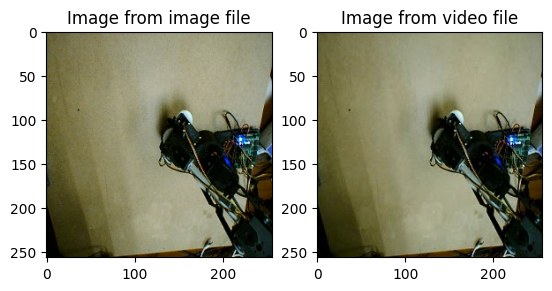

In [6]:
imgno = random.randint(0, demo.maxsteps)
print(f"Image number: {imgno}")
vid_tensor, vid_image = demo.get_image_from_video(imgno)
img_tensor, img_image = demo.get_image(imgno+1, camera=cam)

fig, [ax1, ax2] = plt.subplots(1,2)
ax1.imshow(img_image)
ax1.set_title("Image from image file")
ax2.imshow(vid_image)
ax2.set_title("Image from video file")

In [7]:
vid_tensor - img_tensor

tensor([[[[-0.0275, -0.0235, -0.0078,  ..., -0.0039, -0.0078, -0.0157],
          [-0.0039, -0.0314, -0.0196,  ..., -0.0235, -0.0078, -0.0039],
          [ 0.0000, -0.0196, -0.0196,  ..., -0.0275, -0.0118, -0.0039],
          ...,
          [ 0.0039,  0.0039,  0.0000,  ..., -0.0353, -0.0314, -0.0314],
          [ 0.0039,  0.0000,  0.0000,  ..., -0.0196, -0.0314, -0.0863],
          [ 0.0039,  0.0039,  0.0000,  ...,  0.0000,  0.0000, -0.0471]],

         [[ 0.0000,  0.0039,  0.0157,  ...,  0.0000, -0.0039, -0.0118],
          [ 0.0235, -0.0118,  0.0000,  ..., -0.0196, -0.0039,  0.0000],
          [ 0.0196, -0.0118, -0.0157,  ..., -0.0235, -0.0078,  0.0000],
          ...,
          [ 0.0000,  0.0000, -0.0039,  ...,  0.0000,  0.0039,  0.0000],
          [-0.0039, -0.0039, -0.0039,  ...,  0.0157,  0.0157, -0.0431],
          [-0.0039,  0.0000, -0.0039,  ...,  0.0314,  0.0510,  0.0000]],

         [[-0.0353, -0.0314, -0.0275,  ..., -0.0078, -0.0118, -0.0196],
          [-0.0118, -0.0392, -

In [9]:
demo.move_to_video(delete_img_files=True)